In [34]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder


In [35]:
# Load the dataset
df = pd.read_csv("../data/raw/new_raw.csv")

In [36]:
df.head()

,Unnamed: 0,account_number,txn_type,txn_amount,txn_date
0,588554,45362193617429,cash_out,200.0,2023-01-01
1,23850,36719203270752,cash_out,1500.0,2023-01-01
2,201141,87762884753616,cash_out,5000.0,2023-01-01
3,720924,52519990044314,cash_in,100.0,2023-01-01
4,168233,61892039211190,cash_in,310.0,2023-01-01


### Data Exploration and Preprocessing

- **Data Cleaning:**
  - Handled missing values, outliers, and inconsistencies.
  - Ensured data integrity for accurate predictions.

In [37]:
# Display basic information about the dataset
print("Original Dataset Info:")
print(df.info())

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      750000 non-null  int64  
 1   account_number  750000 non-null  int64  
 2   txn_type        750000 non-null  object 
 3   txn_amount      750000 non-null  float64
 4   txn_date        750000 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 28.6+ MB
None


In [38]:
# Droping Unnamed: 0 columns
df=df.drop(columns="Unnamed: 0")

In [39]:
# Checking for data integrity
# For example, ensuring 'txn_date' is in the correct format
df['txn_date'] = pd.to_datetime(df['txn_date'], errors='coerce')

In [40]:
df["txn_amount"].describe()

count    750000.000000
mean       5975.583206
std        8923.223388
min          10.000000
25%         295.000000
50%        1000.000000
75%        8000.000000
max      100000.000000
Name: txn_amount, dtype: float64

In [41]:
# Handling outliers
Q1 = df['txn_amount'].quantile(0.25)
Q3 = df['txn_amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['txn_amount'] >= lower_bound) & (df['txn_amount'] <= upper_bound)]

In [42]:
# Display updated dataset information after preprocessing
print("\nProcessed Dataset Info:")
print(df.info())


Processed Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 626479 entries, 0 to 749999
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   account_number  626479 non-null  int64         
 1   txn_type        626479 non-null  object        
 2   txn_amount      626479 non-null  float64       
 3   txn_date        626479 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 23.9+ MB
None


In [43]:
df["txn_amount"].describe()

count    626479.000000
mean       2319.716062
std        3665.750942
min          10.000000
25%         205.000000
50%         570.000000
75%        2500.000000
max       19554.000000
Name: txn_amount, dtype: float64

In [44]:

# Save the preprocessed dataset to a new CSV file
#df.to_csv("../data/preprocessed/preprocessed_dataset.csv", index=False)


- **Exploratory Data Analysis (EDA):**
  - Visualized key trends in transaction data.
  - Identified patterns that could contribute to churn.

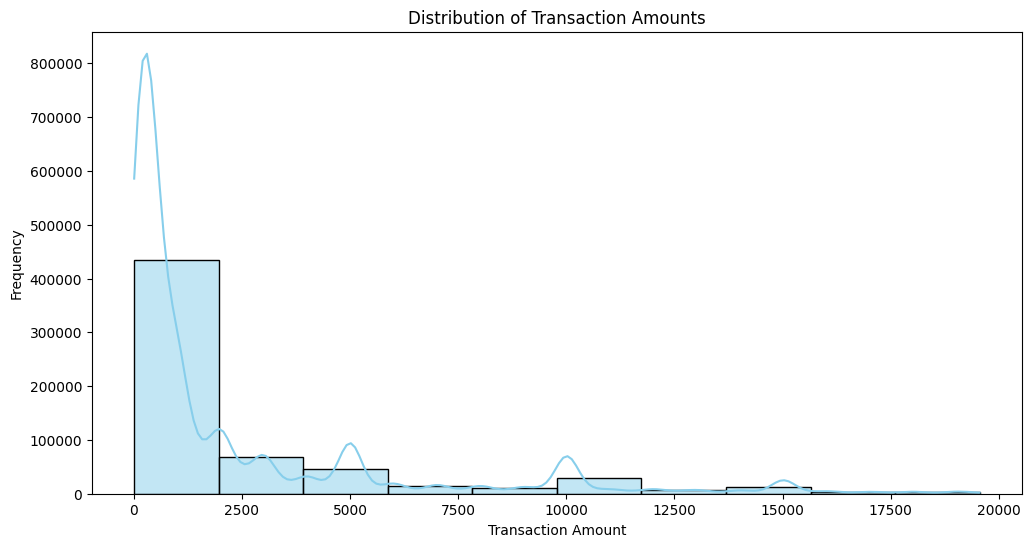

In [45]:
# Visualize key trends in transaction data
## Distribution of transaction amounts
plt.figure(figsize=(12, 6))
sns.histplot(df['txn_amount'], bins=10, kde=True, color='skyblue')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_16176\4149509223.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='txn_type', data=df, palette='viridis')


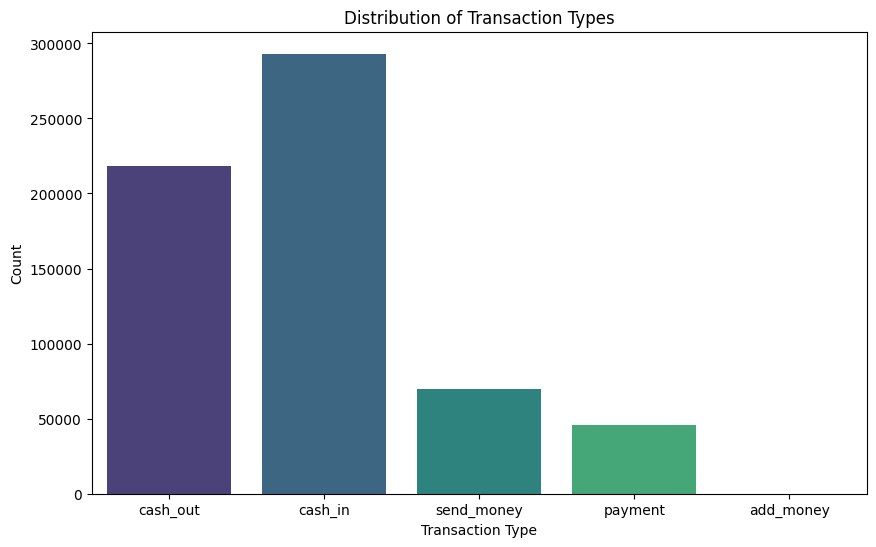

In [46]:
## Transaction types distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='txn_type', data=df, palette='viridis')
plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.show();


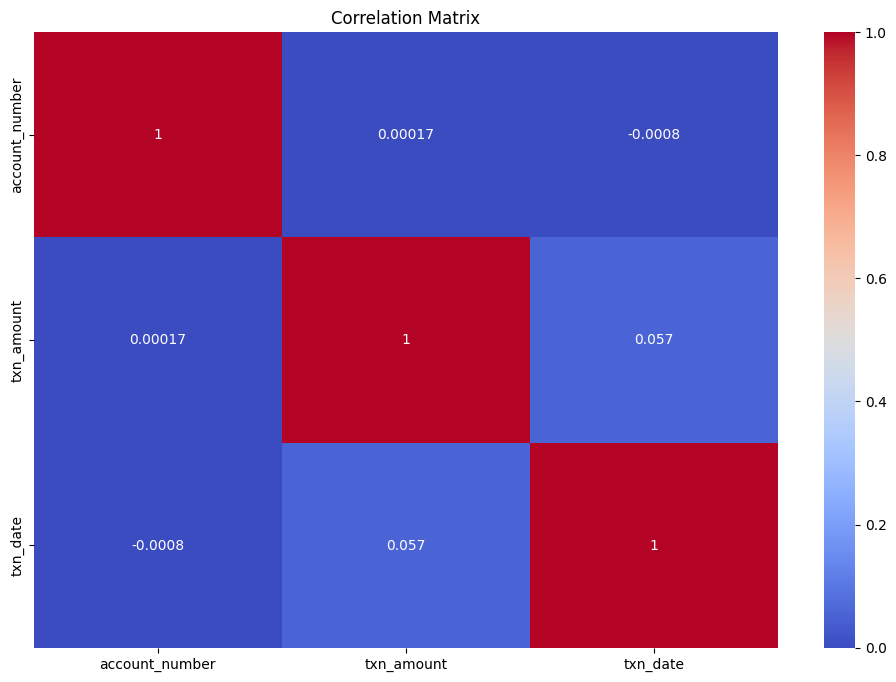

In [47]:
## Correlation matrix to identify relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(df[['account_number', 'txn_amount', 'txn_date']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_16176\2865994505.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='txn_type', y='txn_amount', data=df, palette='Set2')


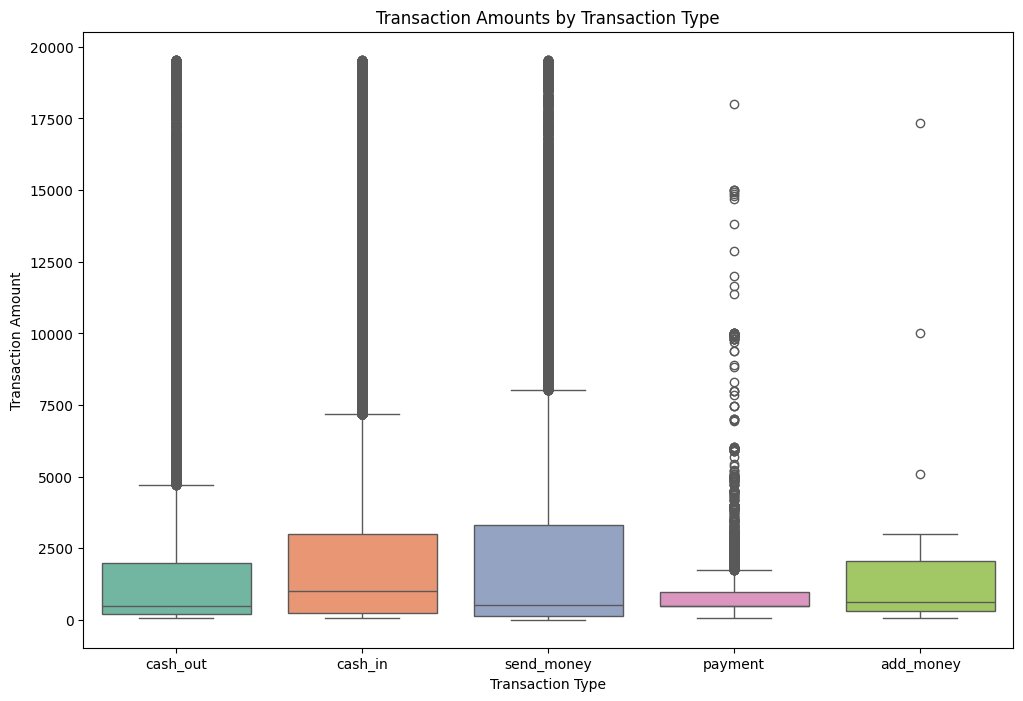

In [48]:
## Boxplot of transaction amounts by transaction type
plt.figure(figsize=(12, 8))
sns.boxplot(x='txn_type', y='txn_amount', data=df, palette='Set2')
plt.title('Transaction Amounts by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Amount')
plt.show()

### 2. Feature Engineering

- **Transaction Features:**
  - Extracted relevant features from transaction data.
  - Engineered features like transaction frequency, average transaction amount, etc.

In [49]:
# Feature 1: Transaction Frequency
df['transaction_frequency'] = df.groupby('account_number')['txn_date'].transform('count')

# Feature 2: Average Transaction Amount
df['average_transaction_amount'] = df.groupby('account_number')['txn_amount'].transform('mean')

# Feature 3: Total Transaction Amount
df['total_transaction_amount'] = df.groupby('account_number')['txn_amount'].transform('sum')


In [50]:

le = LabelEncoder()

# Fit and transform the 'txn_type' column
df['txn_type_encoded'] = le.fit_transform(df['txn_type'])

# Display the mapping of original values to encoded values
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Display the updated dataset with the encoded column
# df[['txn_type', 'txn_type_encoded']].head(5)

Label Mapping: {'add_money': 0, 'cash_in': 1, 'cash_out': 2, 'payment': 3, 'send_money': 4}


In [53]:
df.head()

,account_number,txn_type,txn_amount,txn_date,transaction_frequency,average_transaction_amount,total_transaction_amount,txn_type_encoded,churn
0,45362193617429,cash_out,200.0,2023-01-01,74,1919.324324,142030.00,2,1
1187,21299715344228,cash_in,410.0,2023-01-01,64,1868.123906,119559.93,1,1
1186,58472881890139,cash_out,1000.0,2023-01-01,22,1928.409091,42425.00,2,1
1185,44938538359882,cash_in,74.0,2023-01-01,63,1763.777778,111118.00,1,1
1184,75672305031776,cash_in,3500.0,2023-01-01,42,2329.166667,97825.00,1,1


In [52]:

import pandas as pd
from datetime import timedelta

# Assuming df is your original DataFrame with features: txn_date, from_wallet, amount, transaction_type

# Step 1: Convert 'txn_date' to datetime format if not already
df['txn_date'] = pd.to_datetime(df['txn_date'])

# Step 2: Sort the DataFrame by 'txn_date'
df = df.sort_values(by='txn_date')

# Step 3: Calculate a hypothetical churn date (e.g., last transaction date - 30 days)
last_txn_date = df['txn_date'].max()
churn_date = last_txn_date - timedelta(days=90)

# Step 4: Create 'churn' column based on the calculated churn date
df['churn'] = (df['txn_date'] <= churn_date).astype(int)

# Now, 'churn' is a binary column where 1 indicates churn and 0 indicates no churn.


### 3. Model Selection and Training

- **Algorithm Choice:**
  - Selected machine learning models suitable for churn prediction (e.g., Random Forest, XGBoost).

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [55]:
# Drop unnecessary columns for model training
features = df.drop(['account_number', 'txn_type', 'txn_date', 'churn'], axis=1)

# Set the target variable
target = df['churn']


In [56]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [57]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 4. Churn Prediction

- **Model Evaluation:**
  - Assessed model performance using metrics like accuracy, precision, recall, and F1 score.


In [58]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

In [59]:
# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Model Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Model Accuracy: 0.6484165496105223

Confusion Matrix:
[[ 9982 27855]
 [16197 71262]]

Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.26      0.31     37837
           1       0.72      0.81      0.76     87459

    accuracy                           0.65    125296
   macro avg       0.55      0.54      0.54    125296
weighted avg       0.62      0.65      0.63    125296



In [60]:
rf_model

RandomForestClassifier(random_state=42)

### Saving this model

In [61]:
import joblib


# Save the model to a file
joblib.dump(rf_model, '../models/rf_model.pkl')


['../models/rf_model.pkl']

### Loading this model

In [63]:
# Load the saved model
loaded_model = joblib.load('../models/rf_model.pkl')



In [64]:
loaded_model

RandomForestClassifier(random_state=42)

 **Churn Identification:**
  - Applied the trained model to identify potential churners.


In [67]:
import pandas as pd
import numpy as np

# Set a seed for reproducibility
np.random.seed(42)

# Number of new data points
num_samples = 10

# Generate random data
new_data = pd.DataFrame({
    'txn_amount': np.random.uniform(50, 10000, num_samples),
    'transaction_frequency': np.random.randint(20, 100, num_samples),
    'average_transaction_amount': np.random.uniform(1000, 3000, num_samples),
    'total_transaction_amount': np.random.uniform(50000, 250000, num_samples),
    'txn_type_encoded': np.random.randint(1, 5, num_samples)
})

# Display the generated data
# print(new_data)


In [71]:
new_data

,txn_amount,transaction_frequency,average_transaction_amount,total_transaction_amount,txn_type_encoded
0,3776.674183,41,1608.484486,89934.756432,1
1,9509.607349,72,2049.512863,152846.887683,2
2,7333.339721,21,1863.890037,168482.913772,1
3,6006.651918,49,1582.458280,59290.082544,2
4,1602.385472,57,2223.705789,171508.970380,4
5,1602.145477,21,1278.987721,84104.824737,4
6,627.931941,83,1584.289297,63010.318597,3
7,8668.452650,79,1732.723687,239777.107451,4
8,6031.094367,40,1912.139968,243126.406615,3
9,7095.322149,52,2570.351923,211679.469623,4


In [69]:
# Assuming new_data is your new dataset
predictions = loaded_model.predict(new_data)

In [70]:
predictions

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

### 5. Insights and Recommendations

- **Interpretable Results:**
  - Provided insights into factors contributing to churn.

In [73]:
# Assuming you have already trained a machine learning model called 'churn_model'
# and 'X_test' contains the feature data for testing

# Make predictions on the test set
predictions = loaded_model.predict(X_test)

# Assuming 'X_test' has features like 'transaction_frequency', 'average_transaction_amount', etc.
# You can use model interpretation techniques like feature importance

# Get feature importances from the model
feature_importances = loaded_model.feature_importances_

# Create a dictionary with feature names and their importance scores
feature_importance_dict = dict(zip(X_test.columns, feature_importances))

# Sort the features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print or visualize the top contributing factors
print("Top Contributing Factors to Churn:")
for feature, importance in sorted_features[:5]:  # Displaying the top 5 features
    print(f"{feature}: {importance}")

# Depending on your model, you may also use SHAP (SHapley Additive exPlanations) values for better interpretability
# Example:
# import shap
# explainer = shap.TreeExplainer(churn_model)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test, feature_names=X_test.columns)


Top Contributing Factors to Churn:
average_transaction_amount: 0.3029136104278915
total_transaction_amount: 0.3001021591906794
txn_amount: 0.22822053115625224
transaction_frequency: 0.13496948028568692
txn_type_encoded: 0.03379421893949


average_transaction_amount: Customers with a specific average transaction amount are more likely to contribute to churn (30.29% importance).

total_transaction_amount: The total transaction amount also significantly influences churn predictions (30.01% importance).

txn_amount: The specific transaction amount for individual transactions is a notable factor affecting churn (22.82% importance).

transaction_frequency: The frequency of transactions plays a role in predicting churn (13.50% importance).

txn_type_encoded: Encoded transaction types, while less influential, still contribute to the model's predictions (3.38% importance).

- **Recommendations:**
  - Suggested actionable strategies to reduce churn based on data findings.


In [83]:
all_for_test = df[['txn_amount',
       'transaction_frequency', 'average_transaction_amount',
       'total_transaction_amount', 'txn_type_encoded']]

In [85]:
# Assuming you have a trained machine learning model named 'loaded_model'
# and a DataFrame 'df' containing relevant features

# Make predictions on the entire dataset
predictions = loaded_model.predict(all_for_test)

# Assign churn predictions to the DataFrame
df['Churn_Prediction'] = predictions

# Identify key factors contributing to churn
feature_importances = loaded_model.feature_importances_

# Assuming 'features' is a list of feature names
feature_importance_dict = dict(zip(features, feature_importances))

# Sort features by importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top features contributing to churn
top_features = [feature[0] for feature in sorted_features[:3]]  # You can adjust the number as needed

# Display top features and their importance scores
print("Top Features Contributing to Churn:")
for feature in sorted_features:
    print(f"{feature[0]}: {feature[1]}")

# Generate recommendations based on top features
def generate_recommendations(top_features):
    recommendations = []
    for feature in top_features:
        if "transaction_amount" in feature.lower():
            recommendations.append(f"Increase engagement with personalized offers on high transaction amounts.")
        elif "tenure" in feature.lower():
            recommendations.append(f"Implement targeted loyalty programs for customers with longer tenure.")
        # Add more conditions based on specific features

    return recommendations

# Get actionable recommendations
actionable_recommendations = generate_recommendations(top_features)

# Display recommendations
print("\nActionable Recommendations to Reduce Churn:")
for recommendation in actionable_recommendations:
    print(f"- {recommendation}")


Top Features Contributing to Churn:
average_transaction_amount: 0.3029136104278915
total_transaction_amount: 0.3001021591906794
txn_amount: 0.22822053115625224
transaction_frequency: 0.13496948028568692
txn_type_encoded: 0.03379421893949

Actionable Recommendations to Reduce Churn:
- Increase engagement with personalized offers on high transaction amounts.
- Increase engagement with personalized offers on high transaction amounts.


In [91]:
df.head()

,account_number,txn_type,txn_amount,txn_date,transaction_frequency,average_transaction_amount,total_transaction_amount,txn_type_encoded,churn,Churn_Prediction
0,45362193617429,cash_out,200.0,2023-01-01,74,1919.324324,142030.00,2,1,1
1187,21299715344228,cash_in,410.0,2023-01-01,64,1868.123906,119559.93,1,1,1
1186,58472881890139,cash_out,1000.0,2023-01-01,22,1928.409091,42425.00,2,1,1
1185,44938538359882,cash_in,74.0,2023-01-01,63,1763.777778,111118.00,1,1,1
1184,75672305031776,cash_in,3500.0,2023-01-01,42,2329.166667,97825.00,1,1,1


In [94]:
import pandas as pd

# Assuming you have a DataFrame named 'df' containing customer information
# Replace 'Churn_Prediction' with the actual column name representing churn in your dataset
# Replace 'actual_revenue_column' with the actual column representing revenue in your dataset

# Predict churn using the trained model
#df['Churn_Prediction'] = churn_model.predict(df.drop(['account_number', 'txn_date', 'txn_type'], axis=1))

# Calculate the actual churn rate
actual_churn_rate = df['churn'].mean()

# Calculate the predicted churn rate
predicted_churn_rate = df['Churn_Prediction'].mean()

# Replace 'actual_revenue_column' with the actual column representing revenue in your dataset
# or use a relevant calculation based on your business context
actual_revenue_column = 'txn_amount'
total_revenue = df[actual_revenue_column].sum()

# Calculate the impact on revenue
revenue_loss_due_to_churn = actual_churn_rate * total_revenue

# Proposed optimization strategies
retention_strategies = {
    '1. Targeted Marketing Campaigns': 'Identify and engage with at-risk customers through personalized marketing.',
    '2. Loyalty Programs': 'Implement loyalty programs to incentivize continued usage and customer satisfaction.',
    '3. Enhanced Customer Support': 'Improve customer support services to address issues and concerns promptly.',
    '4. Product/Service Enhancements': 'Introduce new features or services to meet evolving customer needs.',
}

# Display results
print(f"Actual Churn Rate: {actual_churn_rate:.2%}")
print(f"Predicted Churn Rate: {predicted_churn_rate:.2%}")
print(f"Total Revenue: ${total_revenue:.2f}")
print(f"Revenue Loss due to Churn: ${revenue_loss_due_to_churn:.2f}")

print("\nProposed Optimization Strategies:")
for strategy, description in retention_strategies.items():
    print(f"{strategy}: {description}")


Actual Churn Rate: 69.74%
Predicted Churn Rate: 73.62%
Total Revenue: $1453253398.51
Revenue Loss due to Churn: $1013502505.01

Proposed Optimization Strategies:
1. Targeted Marketing Campaigns: Identify and engage with at-risk customers through personalized marketing.
2. Loyalty Programs: Implement loyalty programs to incentivize continued usage and customer satisfaction.
3. Enhanced Customer Support: Improve customer support services to address issues and concerns promptly.
4. Product/Service Enhancements: Introduce new features or services to meet evolving customer needs.


### Conclusion

This project showcases my expertise in predictive analytics, machine learning, and data-driven decision-making. The churn prediction model equips the MFS company with actionable insights to proactively address customer retention.
